## **Load Dataset**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Dataset/ukswgooglereview.csv', encoding='latin1')
df

,Source,Name,Status,Date,Review,Place
0,https://lh3.googleusercontent.com/a-/ALV-UjWbj...,Henry Palandeng,"Local Guide Â· 194 reviews Â· 1,107 photos",a year ago,Lovely place and they preparing fo the new stu...,Asrama UKSW
1,https://lh3.googleusercontent.com/a-/ALV-UjVyK...,Banizman Zai,Local Guide Â· 576 reviews Â· 503 photos,3 months ago,Good,Asrama UKSW
2,https://lh3.googleusercontent.com/a-/ALV-UjUsr...,Eder Timanta Sitepu,"Local Guide Â· 180 reviews Â· 1,171 photos",2 years ago,End of 2015 Stayed at this hostel for 1 week. ...,Asrama UKSW
3,https://lh3.googleusercontent.com/a-/ALV-UjULL...,Marlia Prasetyo,Local Guide Â· 88 reviews Â· 494 photos,a year ago,"The guesthouse has been renovated, clean, beau...",Asrama UKSW
4,https://lh3.googleusercontent.com/a-/ALV-UjW5Y...,sriwidiyastuti tuti,"Local Guide Â· 59 reviews Â· 2,213 photos",3 years ago,"The air in the hostel is cool, the atmosphere ...",Asrama UKSW
...,...,...,...,...,...,...
2011,https://lh3.googleusercontent.com/a-/ALV-UjUpi...,abdul hamid Priharmoko,Local Guide Â· 47 reviews Â· 6 photos,6 years ago,Josss,Yayasan UKSW
2012,https://lh3.googleusercontent.com/a-/ALV-UjUiU...,septian virgananda,Local Guide Â· 54 reviews Â· 48 photos,4 months ago,NaN,Yayasan UKSW
2013,https://lh3.googleusercontent.com/a-/ALV-UjWFQ...,Dimasg Dimas,2 reviews Â· 1 photo,6 years ago,NaN,Yayasan UKSW
2014,https://lh3.googleusercontent.com/a/ACg8ocJJMc...,Radis Mandala,NaN,8 years ago,NaN,Yayasan UKSW


In [3]:
print(df.shape)

(2016, 6)


In [4]:
df = df.dropna(subset=['Review'])
print(df.shape)

(1113, 6)


In [5]:
df["Review"]

0       Lovely place and they preparing fo the new stu...
1                                                    Good
2       End of 2015 Stayed at this hostel for 1 week. ...
3       The guesthouse has been renovated, clean, beau...
4       The air in the hostel is cool, the atmosphere ...
                              ...                        
1925                                           Reasonable
1959                                          comfortable
1982                                                  Yes
2011                                                Josss
2015    It's just a place to hangout with peoples, the...
Name: Review, Length: 1113, dtype: object

## **Cleaning Data**

In [6]:
# Emoticon
import re

EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

EMOTICONS_PATTERN = '|'.join(map(re.escape, EMOTICONS.keys()))

<>:5: SyntaxWarning: invalid escape sequence '\)'
<>:6: SyntaxWarning: invalid escape sequence '\)'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:8: SyntaxWarning: invalid escape sequence '\]'
<>:13: SyntaxWarning: invalid escape sequence '\)'
<>:14: SyntaxWarning: invalid escape sequence '\)'
<>:15: SyntaxWarning: invalid escape sequence '\}'
<>:16: SyntaxWarning: invalid escape sequence '\}'
<>:17: SyntaxWarning: invalid escape sequence '\)'
<>:18: SyntaxWarning: invalid escape sequence '\)'
<>:19: SyntaxWarning: invalid escape sequence '\^'
<>:20: SyntaxWarning: invalid escape sequence '\]'
<>:21: SyntaxWarning: invalid escape sequence '\)'
<>:30: SyntaxWarning: invalid escape sequence '\^'
<>:31: SyntaxWarning: invalid escape sequence '\)'
<>:32: SyntaxWarning: invalid escape sequence '\('
<>:33: SyntaxWarning: invalid escape sequence '\('
<>:34: SyntaxWarning: invalid escape sequence '\('
<>:39: SyntaxWarning: invalid escape sequence '\['
<>:40: SyntaxWarning: invalid escap

In [7]:
def full_clean_text(text):
    text = str(text)
    text = text.lower()                                # Lowercase
    text = re.sub(r'http\S+', '', text)                # Remove URLs
    text = re.sub(r'@\w+', '', text)                   # Remove mentions
    text = re.sub(r'#\w+', '', text)                   # Remove hashtags
    text = re.sub(EMOTICONS_PATTERN, '', text)         # Remove common emoticons
    text = re.sub(r'[^\w\s]', '', text)                # Remove punctuations
    text = re.sub(r'\d+', '', text)                    # Remove numbers
    text = re.sub(r'\s+', ' ', text)                   # Remove extra whitespace
    text = text.encode('ascii', 'ignore').decode('ascii') # Remove emojis
    return text.strip()

df['cleaned_review'] = df['Review'].apply(full_clean_text)

C:\Users\Asus\AppData\Local\Temp\ipykernel_16460\2438811938.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_review'] = df['Review'].apply(full_clean_text)


In [8]:
df['cleaned_review']

0       lovely place and they preparing fo the new stu...
1                                                    good
2       end of stayed at this hostel for week at that ...
3       the guesthouse has been renovated clean beauti...
4       the air in the hostel is cool the atmosphere i...
                              ...                        
1925                                           reasonable
1959                                          comfortable
1982                                                  yes
2011                                                josss
2015    its just a place to hangout with peoples the c...
Name: cleaned_review, Length: 1113, dtype: object

## **Translate Indonesia**

In [9]:
from deep_translator import GoogleTranslator

def convert_indo(token):
    translator = GoogleTranslator(source='auto', target='id')
    translation = translator.translate(token)
    return translation

df['cleaned_review_indo'] = df['cleaned_review'].apply(convert_indo)

## **Tokenisasi**

In [ ]:
df["token"] = df["cleaned_review_indo"].apply(lambda x:x.split())
df["token"]

C:\Users\Asus\AppData\Local\Temp\ipykernel_4544\2389703919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["token"] = df["cleaned_review_indo"].apply(lambda x:x.split())


0       [tempat, yang, indah, dan, mereka, mempersiapk...
1                                                 [Bagus]
2       [Akhir, dari, tinggal, di, asrama, ini, selama...
3       [Guesthouse, telah, direnovasi, taman, dan, ja...
4       [Udara, di, asrama, sangat, dingin, suasana, t...
                              ...                        
1925                                              [wajar]
1959                                             [nyaman]
1982                                                 [Ya]
2011                                              [Josss]
2015    [itu, hanya, tempat, untuk, hangout, dengan, o...
Name: token, Length: 1113, dtype: object

## **Stop Words**

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

def remove_stopwords_from_tokens(tokens):
    return [stopword_remover.remove(token) for token in tokens]

df["token"] = df['token'].apply(remove_stopwords_from_tokens)

C:\Users\Asus\AppData\Local\Temp\ipykernel_4544\3433564580.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["token"] = df['token'].apply(remove_stopwords_from_tokens)


In [ ]:
df["token"]

0       [tempat, , indah, , , mempersiapkan, program, ...
1                                                 [Bagus]
2       [Akhir, , tinggal, , asrama, , selama, semingg...
3       [Guesthouse, , direnovasi, taman, , jalan, , i...
4       [Udara, , asrama, sangat, dingin, suasana, ten...
                              ...                        
1925                                              [wajar]
1959                                             [nyaman]
1982                                                 [Ya]
2011                                              [Josss]
2015    [, , tempat, , hangout, , orang, -orang, slot,...
Name: token, Length: 1113, dtype: object

## **Stemming**

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming_from_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

df["token"] = df['token'].apply(stemming_from_tokens)

C:\Users\Asus\AppData\Local\Temp\ipykernel_4544\337081115.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["token"] = df['token'].apply(stemming_from_tokens)


In [ ]:
df["token"]

0       [tempat, , indah, , , siap, program, studi, baru]
1                                                 [bagus]
2       [akhir, , tinggal, , asrama, , lama, minggu, ,...
3       [guesthouse, , renovasi, taman, , jalan, , ind...
4       [udara, , asrama, sangat, dingin, suasana, ten...
                              ...                        
1925                                              [wajar]
1959                                             [nyaman]
1982                                                 [ya]
2011                                              [josss]
2015    [, , tempat, , hangout, , orang, -orang, slot,...
Name: token, Length: 1113, dtype: object

**Remove Slang Words**

Dengan dataset slang words sebagai berikut :
- Kamus Bahasa Alay (Nasalsabila) :
https://github.com/nasalsabila/kamus-alay/blob/master/colloquial-indonesian-lexicon.csv

- NLP Bahasa Resource (Louisowen6) :
https://github.com/louisowen6/NLP_bahasa_resources/blob/master/combined_slang_words.txt

In [ ]:
lexicon = pd.read_csv("Slang/colloquial-indonesian-lexicon.csv")

slang_dict = dict(zip(lexicon['slang'], lexicon['formal']))

def remove_slang(tokens):
    return [token for token in tokens if token not in slang_dict]

df['token'] = df['token'].apply(remove_slang)

C:\Users\Asus\AppData\Local\Temp\ipykernel_4544\1327188924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['token'] = df['token'].apply(remove_slang)


In [ ]:
import json

with open("Slang/combined_slang_words.txt", encoding='utf-8') as f:
    slang_dict = json.load(f)

def hapus_slang(tokens):
    return [token for token in tokens if token not in slang_dict]

df['token'] = df['token'].apply(hapus_slang)

C:\Users\Asus\AppData\Local\Temp\ipykernel_4544\1447314272.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['token'] = df['token'].apply(hapus_slang)


In [ ]:
df['token']

0       [tempat, , indah, , , siap, program, studi, baru]
1                                                 [bagus]
2       [akhir, , tinggal, , asrama, , lama, minggu, ,...
3       [guesthouse, , renovasi, taman, , jalan, , ind...
4       [udara, , asrama, sangat, dingin, suasana, ten...
                              ...                        
1925                                              [wajar]
1959                                             [nyaman]
1982                                                   []
2011                                              [josss]
2015    [, , tempat, , hangout, , orang, -orang, slot,...
Name: token, Length: 1113, dtype: object

## **Menggabungkan Token Menjadi String**

In [ ]:
df["joined_token"] = df['token'].apply(lambda x: ' '.join(x))
df

C:\Users\Asus\AppData\Local\Temp\ipykernel_4544\940442585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["joined_token"] = df['token'].apply(lambda x: ' '.join(x))


,Source,Name,Status,Date,Review,Place,cleaned_review,cleaned_review_indo,token,joined_token
0,https://lh3.googleusercontent.com/a-/ALV-UjWbj...,Henry Palandeng,"Local Guide Â· 194 reviews Â· 1,107 photos",a year ago,Lovely place and they preparing fo the new stu...,Asrama UKSW,lovely place and they preparing fo the new stu...,tempat yang indah dan mereka mempersiapkan pro...,"[tempat, , indah, , , siap, program, studi, baru]",tempat indah siap program studi baru
1,https://lh3.googleusercontent.com/a-/ALV-UjVyK...,Banizman Zai,Local Guide Â· 576 reviews Â· 503 photos,3 months ago,Good,Asrama UKSW,good,Bagus,[bagus],bagus
2,https://lh3.googleusercontent.com/a-/ALV-UjUsr...,Eder Timanta Sitepu,"Local Guide Â· 180 reviews Â· 1,171 photos",2 years ago,End of 2015 Stayed at this hostel for 1 week. ...,Asrama UKSW,end of stayed at this hostel for week at that ...,Akhir dari tinggal di asrama ini selama seming...,"[akhir, , tinggal, , asrama, , lama, minggu, ,...",akhir tinggal asrama lama minggu waktu t...
3,https://lh3.googleusercontent.com/a-/ALV-UjULL...,Marlia Prasetyo,Local Guide Â· 88 reviews Â· 494 photos,a year ago,"The guesthouse has been renovated, clean, beau...",Asrama UKSW,the guesthouse has been renovated clean beauti...,Guesthouse telah direnovasi taman dan jalan ya...,"[guesthouse, , renovasi, taman, , jalan, , ind...",guesthouse renovasi taman jalan indah tena...
4,https://lh3.googleusercontent.com/a-/ALV-UjW5Y...,sriwidiyastuti tuti,"Local Guide Â· 59 reviews Â· 2,213 photos",3 years ago,"The air in the hostel is cool, the atmosphere ...",Asrama UKSW,the air in the hostel is cool the atmosphere i...,Udara di asrama sangat dingin suasana tenang f...,"[udara, , asrama, sangat, dingin, suasana, ten...",udara asrama sangat dingin suasana tenang fas...
...,...,...,...,...,...,...,...,...,...,...
1925,https://lh3.googleusercontent.com/a/ACg8ocKoJb...,Ir Setiyawan,Google,6 years ago on,Reasonable,Wisma Tamu UKSW,reasonable,wajar,[wajar],wajar
1959,https://lh3.googleusercontent.com/a/ACg8ocLgZ7...,Gadget Addict,Google,6 years ago on,comfortable,Wisma Tamu UKSW,comfortable,nyaman,[nyaman],nyaman
1982,https://lh3.googleusercontent.com/a-/ALV-UjWtG...,Gama Airlanda,Google,7 years ago on,Yes,Wisma Tamu UKSW,yes,Ya,[],
2011,https://lh3.googleusercontent.com/a-/ALV-UjUpi...,abdul hamid Priharmoko,Local Guide Â· 47 reviews Â· 6 photos,6 years ago,Josss,Yayasan UKSW,josss,Josss,[josss],josss


## **Menghilangkan Rows Kosong**

In [ ]:
df = df[df['joined_token'].fillna('').str.strip().astype(bool)]
print(df.shape)
df

(1097, 10)


,Source,Name,Status,Date,Review,Place,cleaned_review,cleaned_review_indo,token,joined_token
0,https://lh3.googleusercontent.com/a-/ALV-UjWbj...,Henry Palandeng,"Local Guide Â· 194 reviews Â· 1,107 photos",a year ago,Lovely place and they preparing fo the new stu...,Asrama UKSW,lovely place and they preparing fo the new stu...,tempat yang indah dan mereka mempersiapkan pro...,"[tempat, , indah, , , siap, program, studi, baru]",tempat indah siap program studi baru
1,https://lh3.googleusercontent.com/a-/ALV-UjVyK...,Banizman Zai,Local Guide Â· 576 reviews Â· 503 photos,3 months ago,Good,Asrama UKSW,good,Bagus,[bagus],bagus
2,https://lh3.googleusercontent.com/a-/ALV-UjUsr...,Eder Timanta Sitepu,"Local Guide Â· 180 reviews Â· 1,171 photos",2 years ago,End of 2015 Stayed at this hostel for 1 week. ...,Asrama UKSW,end of stayed at this hostel for week at that ...,Akhir dari tinggal di asrama ini selama seming...,"[akhir, , tinggal, , asrama, , lama, minggu, ,...",akhir tinggal asrama lama minggu waktu t...
3,https://lh3.googleusercontent.com/a-/ALV-UjULL...,Marlia Prasetyo,Local Guide Â· 88 reviews Â· 494 photos,a year ago,"The guesthouse has been renovated, clean, beau...",Asrama UKSW,the guesthouse has been renovated clean beauti...,Guesthouse telah direnovasi taman dan jalan ya...,"[guesthouse, , renovasi, taman, , jalan, , ind...",guesthouse renovasi taman jalan indah tena...
4,https://lh3.googleusercontent.com/a-/ALV-UjW5Y...,sriwidiyastuti tuti,"Local Guide Â· 59 reviews Â· 2,213 photos",3 years ago,"The air in the hostel is cool, the atmosphere ...",Asrama UKSW,the air in the hostel is cool the atmosphere i...,Udara di asrama sangat dingin suasana tenang f...,"[udara, , asrama, sangat, dingin, suasana, ten...",udara asrama sangat dingin suasana tenang fas...
...,...,...,...,...,...,...,...,...,...,...
1910,https://lh3.googleusercontent.com/a-/ALV-UjXcA...,wahyu butomo,Google,5 years ago on,Comfortable,Wisma Tamu UKSW,comfortable,nyaman,[nyaman],nyaman
1925,https://lh3.googleusercontent.com/a/ACg8ocKoJb...,Ir Setiyawan,Google,6 years ago on,Reasonable,Wisma Tamu UKSW,reasonable,wajar,[wajar],wajar
1959,https://lh3.googleusercontent.com/a/ACg8ocLgZ7...,Gadget Addict,Google,6 years ago on,comfortable,Wisma Tamu UKSW,comfortable,nyaman,[nyaman],nyaman
2011,https://lh3.googleusercontent.com/a-/ALV-UjUpi...,abdul hamid Priharmoko,Local Guide Â· 47 reviews Â· 6 photos,6 years ago,Josss,Yayasan UKSW,josss,Josss,[josss],josss


## **WordCloud Hasil Preprocess**

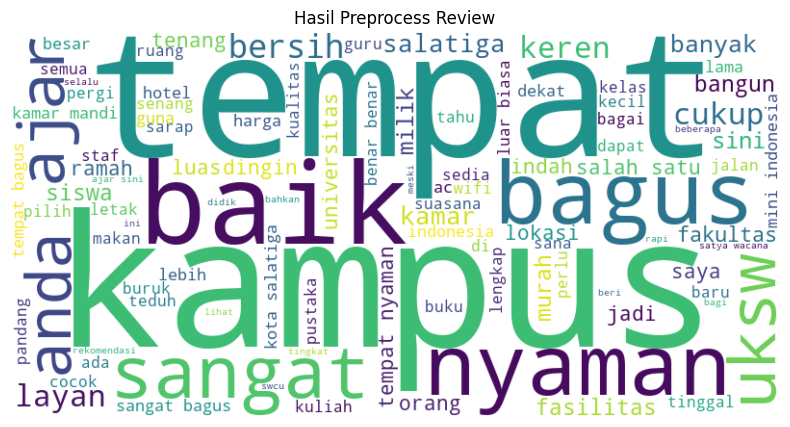

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['joined_token'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Hasil Preprocess Review")
plt.show()

## **Simpan Hasil Cleaned Data**

In [ ]:
df.to_csv('Dataset/cleaned_review.csv', index=False)

## **Labelling Dengan Model Pretrained ayameRushia IndoBERT**

- Sumber : https://huggingface.co/ayameRushia/indobert-base-uncased-finetuned-indonlu-smsa

**Load Libraries**

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoConfig, AutoModel
import torch
import torch.nn.functional as F

**Load Model**

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa")
model = AutoModelForSequenceClassification.from_pretrained("ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa")
model.eval()

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

**Check Label Mapping Dari Model**

In [ ]:
config = AutoConfig.from_pretrained("ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa")
print(config.id2label)

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


{0: 'Positive', 1: 'Neutral', 2: 'Negative'}


**Function untuk Labelling**

In [ ]:
label_map = {0: "Positive", 1: "Neutral", 2: "Negative"}

def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = F.softmax(logits, dim=1)
        label_id = torch.argmax(probs, dim=1).item()
    return label_map[label_id]

**Melabeli kolom joined_kolom**

In [ ]:
df['label'] = df['joined_token'].apply(predict_sentiment)
df.to_csv('Dataset/labelled_review.csv', index=False)
df['label'].value_counts()

C:\Users\Asus\AppData\Local\Temp\ipykernel_4544\171871055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['joined_token'].apply(predict_sentiment)


label
Positive    739
Neutral     227
Negative    131
Name: count, dtype: int64

**Visualiasi Label**

<function matplotlib.pyplot.show(close=None, block=None)>

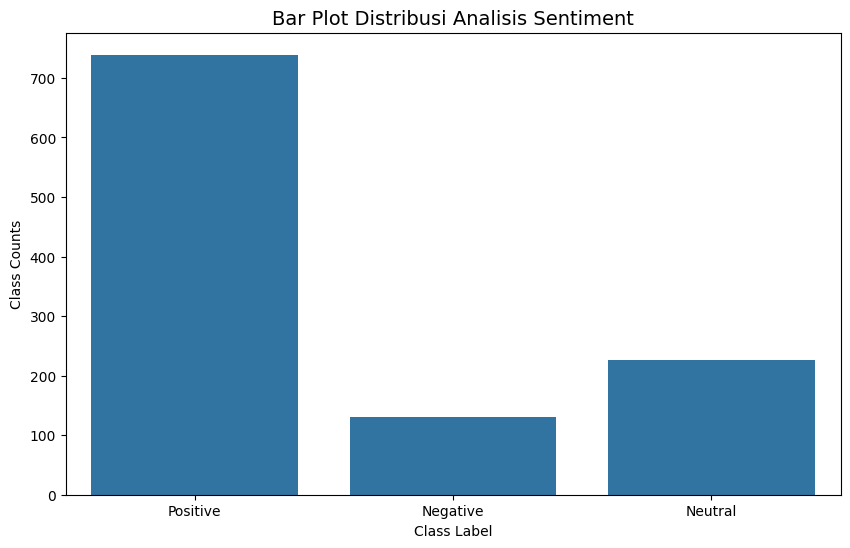

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.countplot(data=df, x='label')

plt.title("Bar Plot Distribusi Analisis Sentiment", fontsize="14")
plt.xlabel("Class Label")
plt.ylabel("Class Counts")
plt.show

## **IndoBERT**

**Convert Label ke tipe Numeric**

In [ ]:
label_map = {"Positive" : 0,"Neutral" : 1,"Negative" : 2}
df['label_num'] = df['label'].map(label_map)

C:\Users\Asus\AppData\Local\Temp\ipykernel_4544\3309396898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_num'] = df['label'].map(label_map)


**Load Model**

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")
model = AutoModel.from_pretrained("indolem/indobert-base-uncased")
model.eval()

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(31923, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

**Pembobotan Kata Dengan CLS**

In [ ]:
def get_cls_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    cls_embed = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
    return cls_embed

In [ ]:
df['embedding'] = df['joined_token'].apply(get_cls_embedding)
df['embedding']

C:\Users\Asus\AppData\Local\Temp\ipykernel_4544\535675688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embedding'] = df['joined_token'].apply(get_cls_embedding)


0       [-0.09398498, -1.6351118, -0.39209515, 0.84833...
1       [-2.0820365, -0.25178546, -0.19493231, -0.8147...
2       [-1.1833632, -0.39143327, -1.3737977, 0.491289...
3       [-0.18378843, 0.33248127, -0.7245068, 0.580736...
4       [-0.6781832, -0.12288076, -0.5771497, 0.060411...
                              ...                        
1910    [-1.0340828, 0.14251728, -0.60096836, -0.29535...
1925    [-0.9714236, -0.6287171, 0.42575073, -0.532210...
1959    [-1.0340828, 0.14251728, -0.60096836, -0.29535...
2011    [0.04458195, -1.0234294, -0.91733015, 1.016862...
2015    [-0.198839, -0.6060751, -1.2464044, 1.4699725,...
Name: embedding, Length: 1097, dtype: object

**Load Libraries untuk Train Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X = np.vstack(df['embedding'].values)
y = df['label_num'].values

**Splitting Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train Model dan Predict**

In [ ]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

**Hasil Evaluasi Model IndoBERT**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
from sklearn.preprocessing import LabelBinarizer

In [ ]:
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
predictions_bin = lb.transform(y_pred)

print("Model : IndoBERT")
print("Accuracy  =", round(accuracy_score(y_test, y_pred) * 100, 2), '%')
print("Recall    =", round(recall_score(y_test, y_pred, average='weighted') * 100, 2), '%')
print("Precision =", round(precision_score(y_test, y_pred, average='weighted') * 100, 2), '%')
print("F1-Score  =", round(f1_score(y_test, y_pred, average='weighted') * 100, 2), '%')

try:
    roc_auc = roc_auc_score(y_test_bin, predictions_bin, average='weighted', multi_class='ovo')
    print("ROC AUC   =", round(roc_auc, 4))
except ValueError:
    print("ROC AUC   = Cannot compute (likely due to one or more missing classes in predictions)")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred,target_names=['Positive', 'Neutral', 'Negative']))

Model : IndoBERT
Accuracy  = 65.0 %
Recall    = 65.0 %
Precision = 63.81 %
F1-Score  = 64.35 %
ROC AUC   = 0.6245
Confusion Matrix:
 [[122  21  10]
 [ 20  17   5]
 [ 15   6   4]]
Classification Report:
               precision    recall  f1-score   support

    Positive       0.78      0.80      0.79       153
     Neutral       0.39      0.40      0.40        42
    Negative       0.21      0.16      0.18        25

    accuracy                           0.65       220
   macro avg       0.46      0.45      0.45       220
weighted avg       0.64      0.65      0.64       220



**Confussion Matrix IndoBERT**

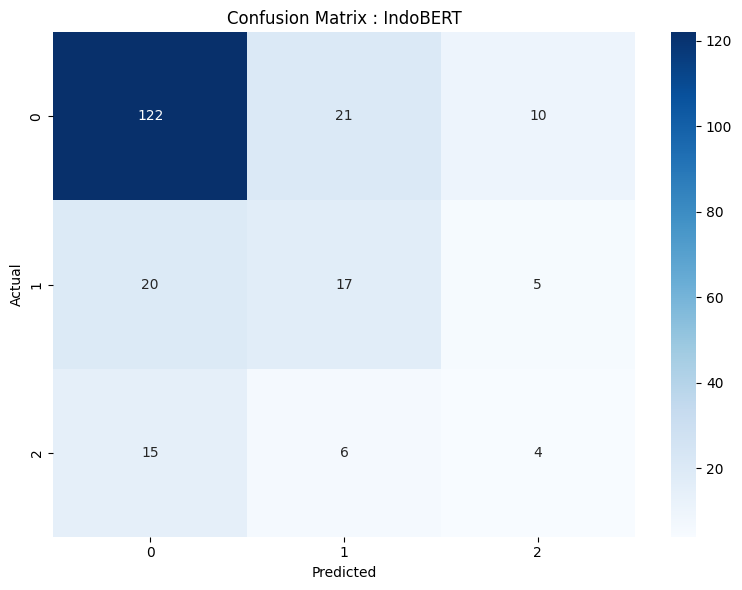

In [ ]:
def show_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

show_confusion_matrix(y_test, y_pred, title='Confusion Matrix : IndoBERT')

## **Model LDA Topic**

**Import Libraries**

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim import models
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

**LDA Topik Sentimen**

In [ ]:
lda_models = {}
coherence_scores = {}

sentiment_groups = df.groupby('label')

for sentiment, group in sentiment_groups:
    print(f"Membuat LDA untuk sentimen: {sentiment}")

    texts = group['token'].dropna().tolist()
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    lda_model = models.LdaModel(corpus=corpus, 
                                id2word=dictionary, 
                                num_topics=10, 
                                random_state=100, 
                                update_every=1, 
                                chunksize=100, 
                                passes=10, 
                                alpha='auto', 
                                per_word_topics=True)
    lda_models[sentiment] = (lda_model, corpus, dictionary)

    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores[sentiment] = coherence_score

    print(f"\nTopik untuk sentimen '{sentiment}':")
    pprint(lda_model.print_topics())
    doc_lda = lda_model[corpus]
    print('\nPerplexity: ', lda_model.log_perplexity(corpus))
    print(f"\nCoherence Score '{sentiment}': {coherence_score:.4f}")
    print("\n" + "-"*60 + "\n")

Membuat LDA untuk sentimen: Negative

Topik untuk sentimen 'Negative':
[(0,
  '0.079*"dingin" + 0.071*"bau" + 0.064*"mesan" + 0.033*"online" + 0.033*"air" '
  '+ 0.008*"dong" + 0.008*"beku" + 0.008*"pinus" + 0.008*"jenis" + '
  '0.008*"satu"'),
 (1,
  '0.346*"" + 0.031*"kamar" + 0.022*"mandi" + 0.022*"buruk" + 0.018*"baik" + '
  '0.017*"bersih" + 0.014*"bangun" + 0.011*"tua" + 0.010*"milik" + '
  '0.010*"bagus"'),
 (2,
  '0.034*"" + 0.018*"kakak" + 0.018*"kristen" + 0.016*"gigi" + '
  '0.013*"perempuan" + 0.013*"sangat" + 0.012*"kampus" + 0.012*"bahasa" + '
  '0.012*"staf" + 0.011*"kuliah"'),
 (3,
  '0.285*"" + 0.043*"tempat" + 0.018*"bersih" + 0.017*"sarap" + 0.013*"layan" '
  '+ 0.012*"fasilitas" + 0.012*"makan" + 0.012*"tidak" + 0.011*"ajar" + '
  '0.011*"sangat"'),
 (4,
  '0.019*"rumah" + 0.019*"lama" + 0.010*"damping" + 0.010*"temu" + 0.010*"lag" '
  '+ 0.010*"parahhh" + 0.010*"sih" + 0.010*"wifi" + 0.010*"bagi" + '
  '0.010*"kampus"'),
 (5,
  '0.077*"kotor" + 0.035*"handuk" + 0.0

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Positive']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Neutral']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Negative']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, start=1, limit=31, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(
            corpus=corpus,
            num_topics=num_topics,
            id2word=dictionary,
            random_state=100,
            update_every=1,
            chunksize=100,
            passes=10,
            alpha='auto',
            per_word_topics=False
        )
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

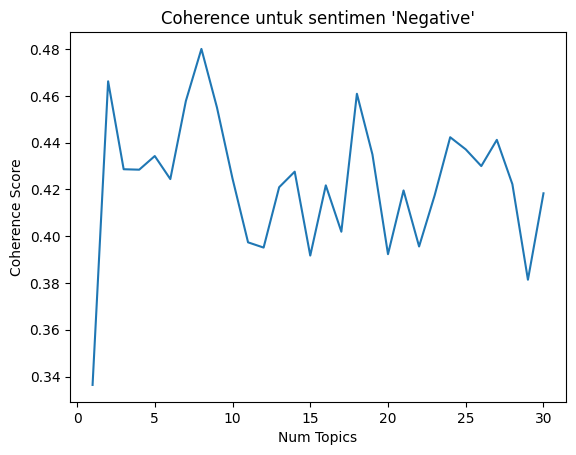

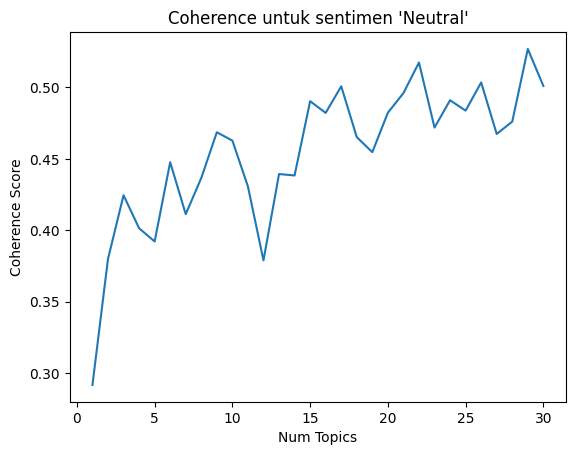

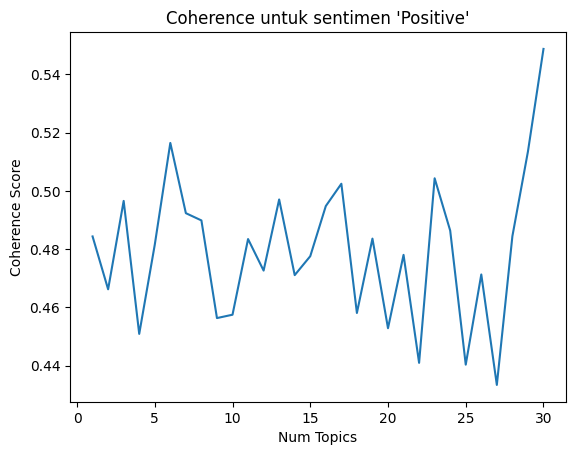

In [ ]:
import matplotlib.pyplot as plt

for sentiment, group in sentiment_groups:
    texts = group['token'].dropna().tolist()
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    model_list, coherence_values = compute_coherence_values(
        dictionary=dictionary, 
        corpus=corpus, 
        texts=texts,
        start=1, 
        limit=31, 
        step=1
    )

    plt.plot(range(1, 31), coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence Score")
    plt.title(f"Coherence untuk sentimen '{sentiment}'")
    plt.show()

In [ ]:
for sentiment, group in sentiment_groups:
    print(f"Membuat LDA untuk sentimen: {sentiment}")

    texts = group['token'].dropna().tolist()
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    start, limit, step = 2, 31, 2
    x = list(range(start, limit, step))

    model_list, coherence_values = compute_coherence_values(
        dictionary=dictionary,
        corpus=corpus,
        texts=texts,
        start=start,
        limit=limit,
        step=step
    )

    print("\nCoherence per jumlah topik:")
    for m, cv in zip(x, coherence_values):
        print("Num Topics =", m, "has Coherence Value of", round(cv, 4))
    print("\n" + "-"*60 + "\n")

Membuat LDA untuk sentimen: Negative

Coherence per jumlah topik:
Num Topics = 2 has Coherence Value of 0.4662
Num Topics = 4 has Coherence Value of 0.4284
Num Topics = 6 has Coherence Value of 0.4244
Num Topics = 8 has Coherence Value of 0.4801
Num Topics = 10 has Coherence Value of 0.4246
Num Topics = 12 has Coherence Value of 0.3951
Num Topics = 14 has Coherence Value of 0.4276
Num Topics = 16 has Coherence Value of 0.4217
Num Topics = 18 has Coherence Value of 0.4609
Num Topics = 20 has Coherence Value of 0.3923
Num Topics = 22 has Coherence Value of 0.3956
Num Topics = 24 has Coherence Value of 0.4423
Num Topics = 26 has Coherence Value of 0.43
Num Topics = 28 has Coherence Value of 0.4222
Num Topics = 30 has Coherence Value of 0.4183

------------------------------------------------------------

Membuat LDA untuk sentimen: Neutral

Coherence per jumlah topik:
Num Topics = 2 has Coherence Value of 0.38
Num Topics = 4 has Coherence Value of 0.4014
Num Topics = 6 has Coherence Value

**LDA Topik Fasilitas**

In [ ]:
df.Place.value_counts()

Place
Kampus Utama UKSW                                   594
Wisma Tamu UKSW                                     515
Fakultas Teknologi Informasi UKSW                   199
SMA LAB UKSW                                        113
Perpustakaan UKSW                                    88
Kantin Rindang UKSW                                  87
Klinik UKSW                                          74
Fakultas Hukum UKSW                                  38
Fakultas Teologi UKSW                                34
Fakultas Ekonomi dan Bisnis UKSW                     30
Kursus Musik UKSW                                    26
Fakultas Bahasa dan Seni UKSW                        20
Fakultas Ilmu Sosial dan Ilmu Komunikasi UKSW        20
Fakultas Kedokteran dan Ilmu-Ilmu Kesehatan UKSW     20
Fakultas Keguruan dan Ilmu Pengetahuan UKSW          20
Fakultas Science dan Matematika UKSW                 12
Gedung Administrasi Pusat UKSW                       11
Asrama UKSW                               

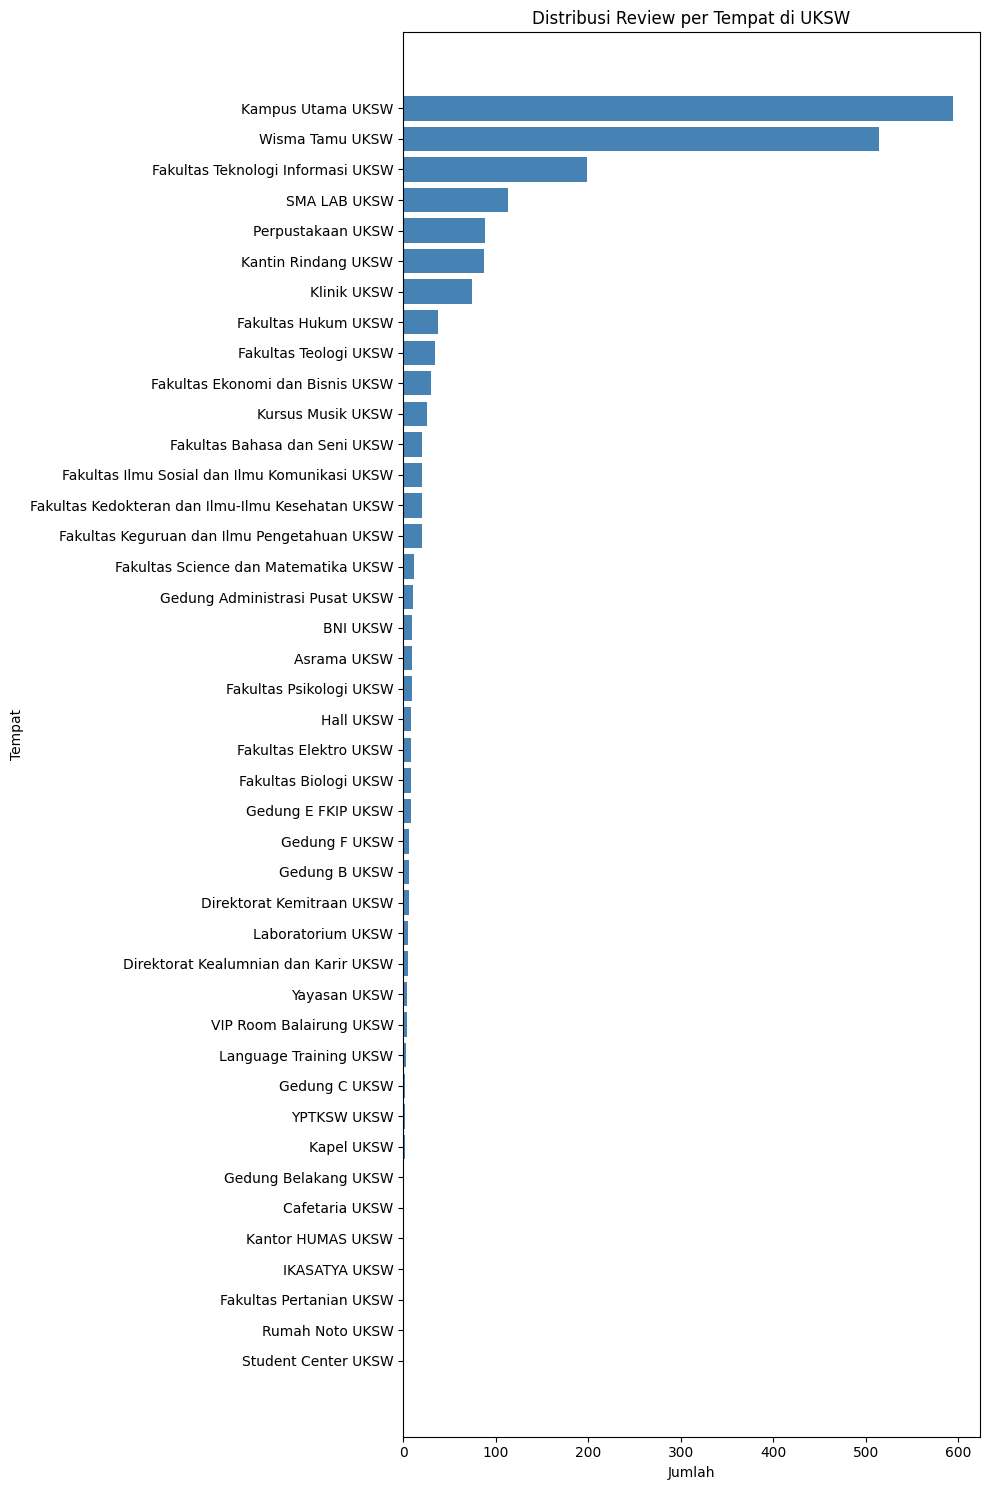

In [ ]:
import matplotlib.pyplot as plt

place_counts = df['Place'].value_counts().reset_index()
place_counts.columns = ['Place', 'Jumlah']

place_counts_sorted = place_counts.sort_values('Jumlah', ascending=True)

plt.figure(figsize=(10, 15))
plt.barh(place_counts_sorted['Place'], place_counts_sorted['Jumlah'], color='steelblue')
plt.xlabel("Jumlah")
plt.ylabel("Tempat")
plt.title("Distribusi Review per Tempat di UKSW")
plt.tight_layout()
plt.show()

In [ ]:
lda_models = {}
coherence_scores = {}

place_groups = df.groupby('Place')

for place, group in place_groups:
    print(f"Membuat LDA untuk tempat: {place}")

    texts = group['token'].dropna().tolist()
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    lda_model = models.LdaModel(corpus=corpus, 
                                id2word=dictionary, 
                                num_topics=5, 
                                random_state=100, 
                                update_every=1, 
                                chunksize=100, 
                                passes=10, 
                                alpha='auto', 
                                per_word_topics=True)
    lda_models[place] = (lda_model, corpus, dictionary)

    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores[place] = coherence_score

    print(f"\nTopik untuk tempat: '{place}':")
    pprint(lda_model.print_topics())
    doc_lda = lda_model[corpus]
    print('\nPerplexity: ', lda_model.log_perplexity(corpus))
    print(f"\nCoherence Score '{place}': {coherence_score:.4f}")
    print("\n" + "-"*60 + "\n")

Membuat LDA untuk tempat: Asrama UKSW


KeyError: 'token'

In [ ]:
print(df["Place"].unique())
print(len(df["Place"].unique()))

['Asrama UKSW' 'BNI UKSW' 'Direktorat Kealumnian dan Karir UKSW'
 'Direktorat Kemitraan UKSW' 'Fakultas Pertanian UKSW'
 'Fakultas Bahasa dan Seni UKSW' 'Fakultas Biologi UKSW'
 'Fakultas Ekonomi dan Bisnis UKSW' 'Fakultas Elektro UKSW' 'Kapel UKSW'
 'Fakultas Hukum UKSW' 'Fakultas Ilmu Sosial dan Ilmu Komunikasi UKSW'
 'Fakultas Kedokteran dan Ilmu-Ilmu Kesehatan UKSW'
 'Fakultas Keguruan dan Ilmu Pengetahuan UKSW' 'Fakultas Psikologi UKSW'
 'Fakultas Science dan Matematika UKSW' 'IKASATYA UKSW'
 'Fakultas Teknologi Informasi UKSW' 'Fakultas Teologi UKSW'
 'Gedung Administrasi Pusat UKSW' 'Gedung B UKSW' 'Gedung E FKIP UKSW'
 'Gedung F UKSW' 'Hall UKSW' 'Kampus Utama UKSW' 'Kantin Rindang UKSW'
 'Klinik UKSW' 'Kursus Musik UKSW' 'YPTKSW UKSW' 'Laboratorium UKSW'
 'Gedung Belakang UKSW' 'Rumah Noto UKSW' 'Gedung C UKSW'
 'Language Training UKSW' 'Perpustakaan UKSW' 'SMA LAB UKSW'
 'VIP Room Balairung UKSW' 'Kantor HUMAS UKSW' 'Cafetaria UKSW'
 'Wisma Tamu UKSW' 'Yayasan UKSW' 'Student 

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Asrama UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['BNI UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Direktorat Kealumnian dan Karir UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Direktorat Kemitraan UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Fakultas Pertanian UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Fakultas Bahasa dan Seni UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Fakultas Biologi UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Fakultas Ekonomi dan Bisnis UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Fakultas Elektro UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Kapel UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Fakultas Hukum UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Fakultas Ilmu Sosial dan Ilmu Komunikasi UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Fakultas Kedokteran dan Ilmu-Ilmu Kesehatan UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Fakultas Keguruan dan Ilmu Pengetahuan UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Fakultas Psikologi UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Fakultas Science dan Matematika UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['IKASATYA UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Fakultas Teknologi Informasi UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Fakultas Teologi UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Gedung Administrasi Pusat UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Gedung B UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Gedung E FKIP UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Gedung F UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Hall UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Kampus Utama UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Kantin Rindang UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Klinik UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Kursus Musik UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['YPTKSW UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Laboratorium UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Gedung Belakang UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Rumah Noto UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Gedung C UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Language Training UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Perpustakaan UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['SMA LAB UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['VIP Room Balairung UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Kantor HUMAS UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Cafetaria UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Wisma Tamu UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Yayasan UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

In [ ]:
import pyLDAvis.gensim_models

lda_model, corpus, dictionary = lda_models['Student Center UKSW']
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis.topic_coordinates['x'] = vis.topic_coordinates['x'].apply(np.real)
vis.topic_coordinates['y'] = vis.topic_coordinates['y'].apply(np.real)

pyLDAvis.display(vis)

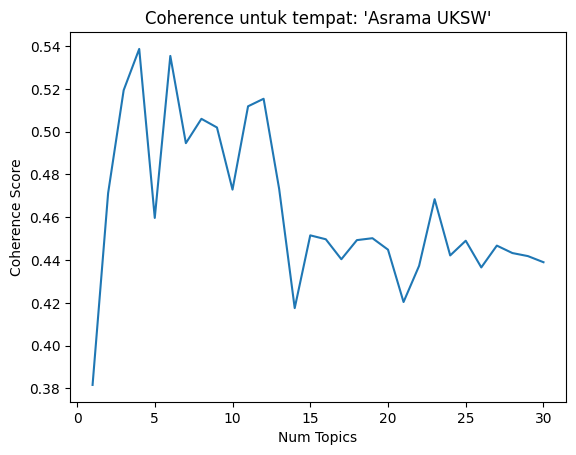

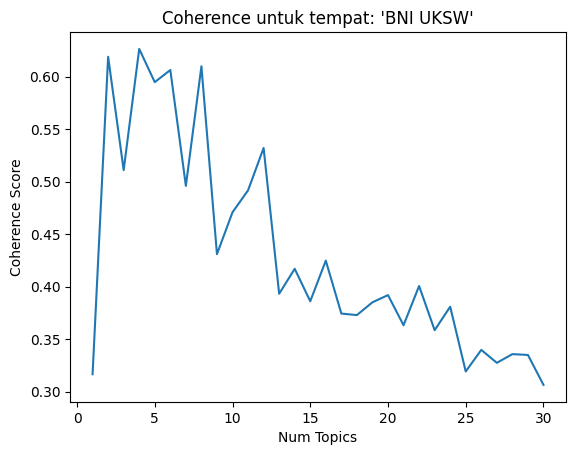

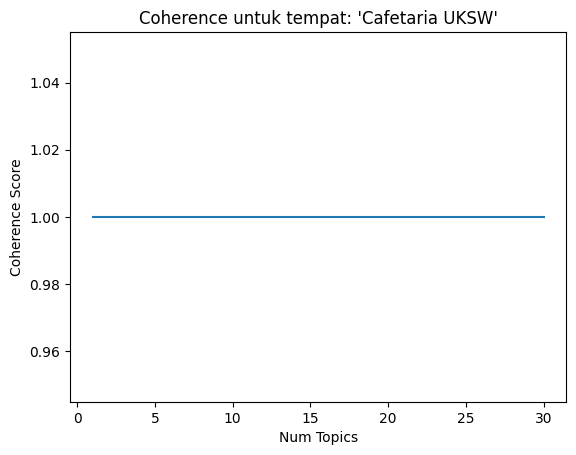

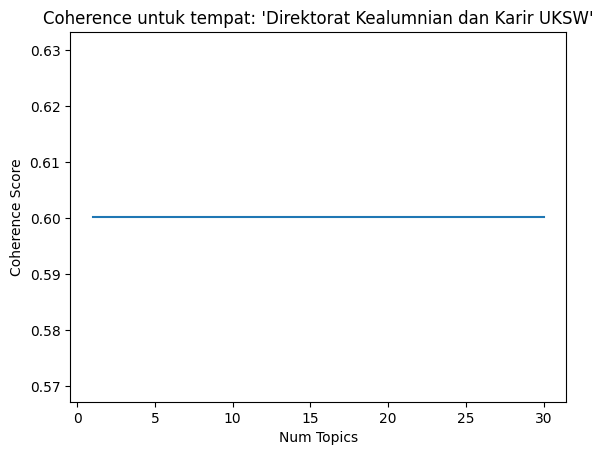

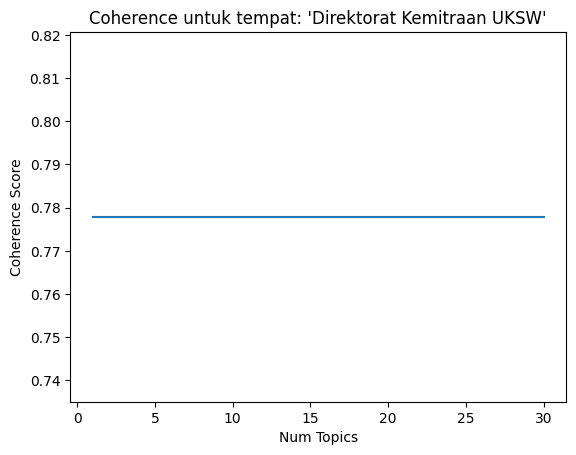

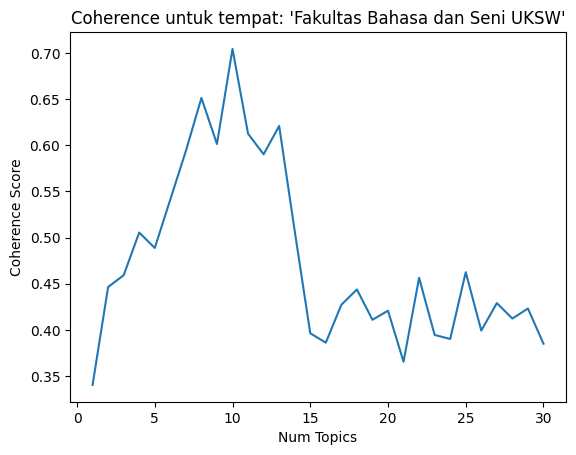

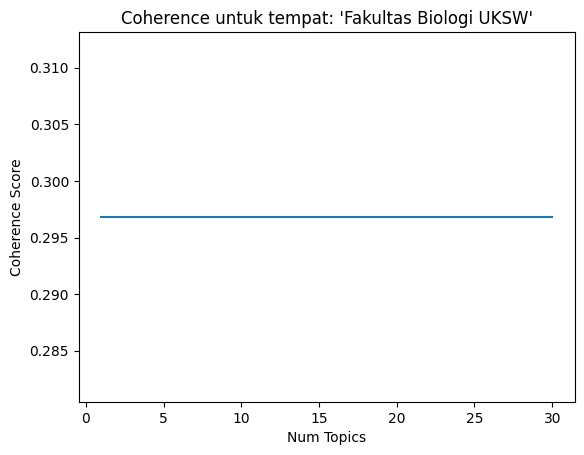

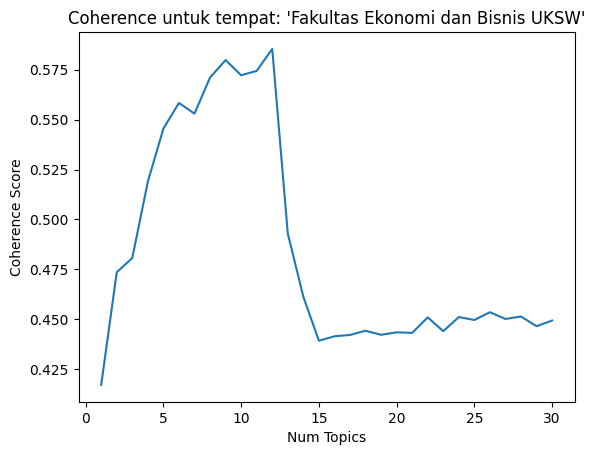

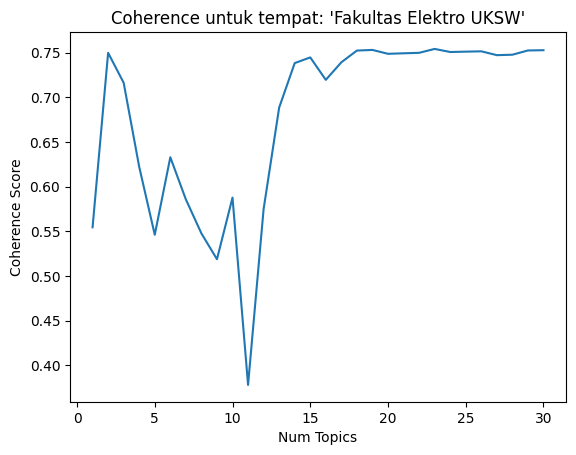

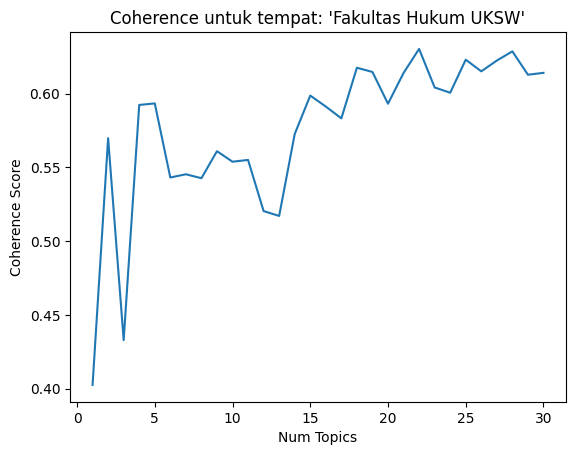

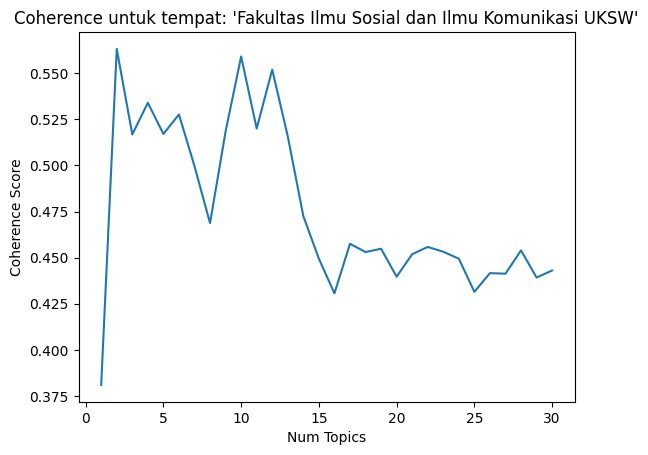

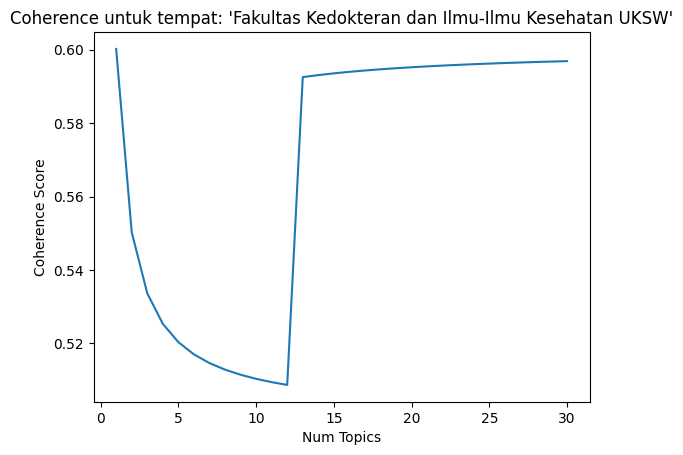

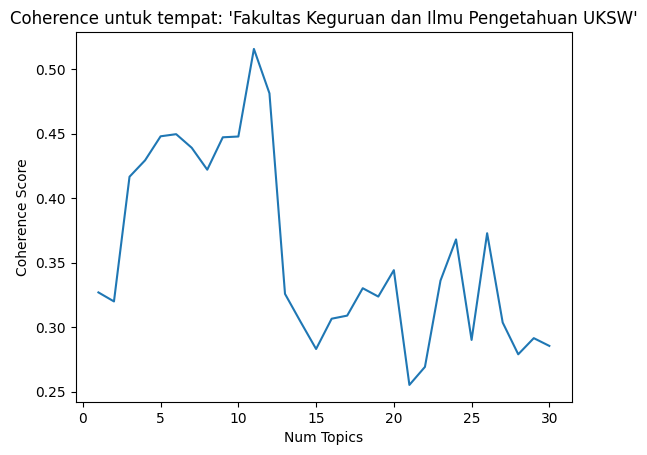

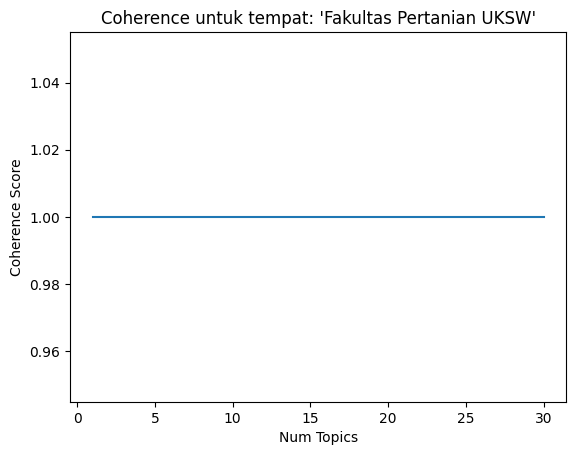

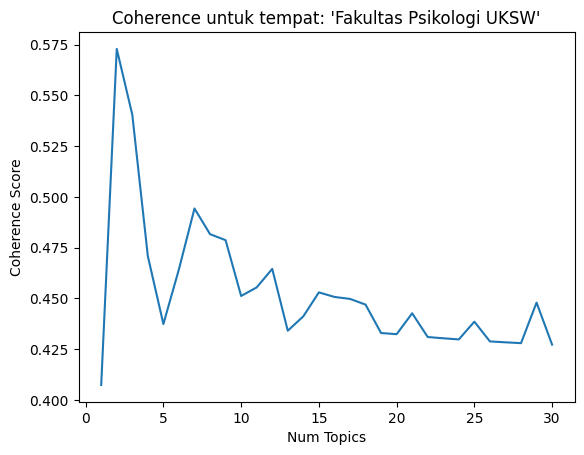

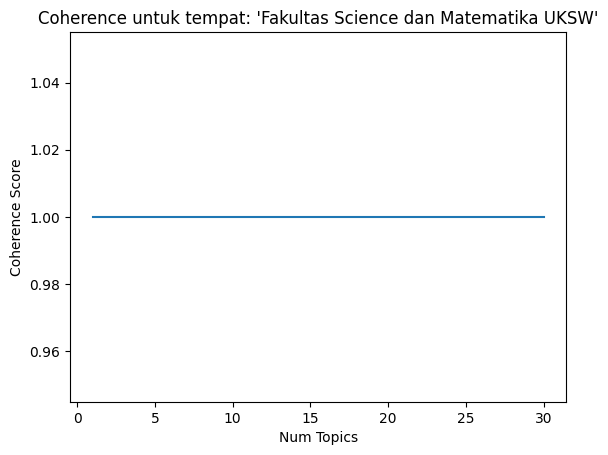

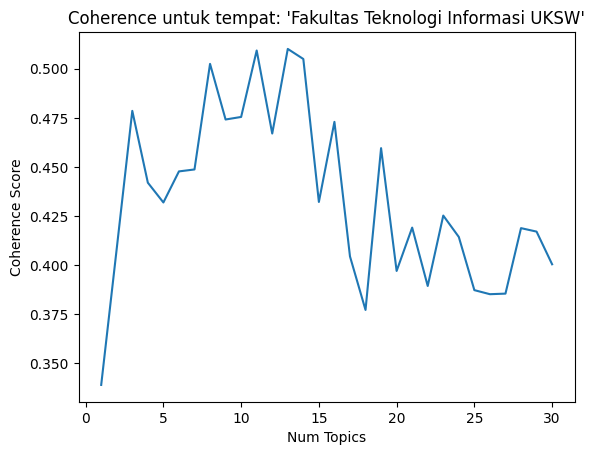

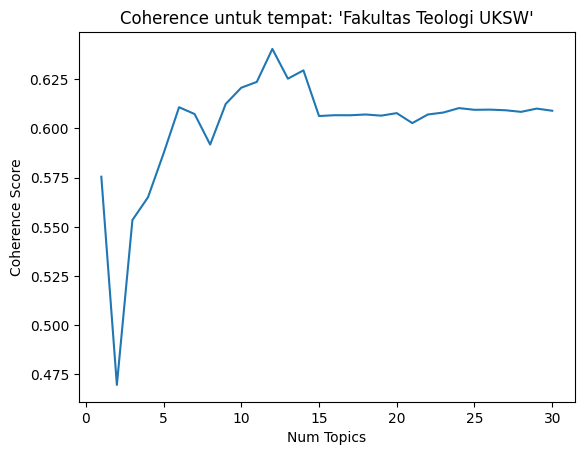

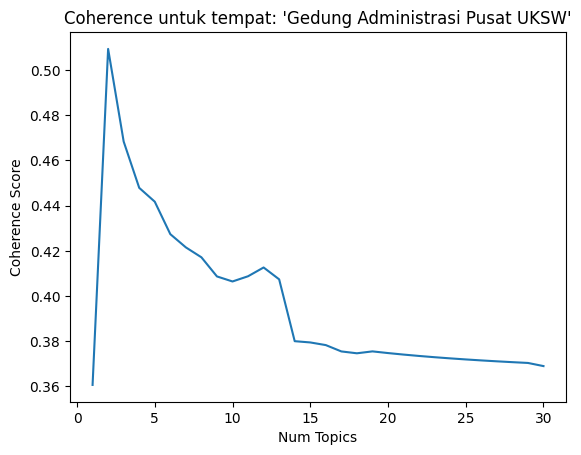

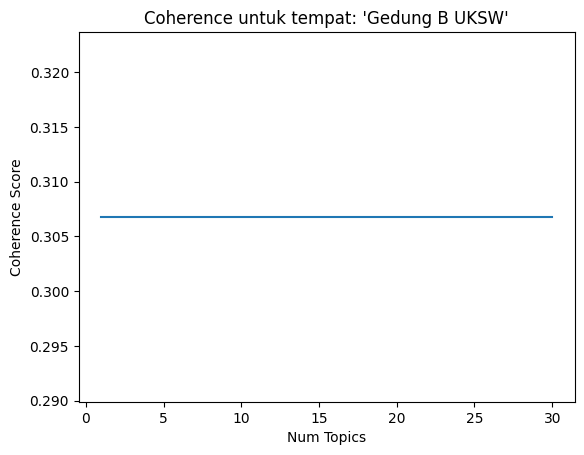

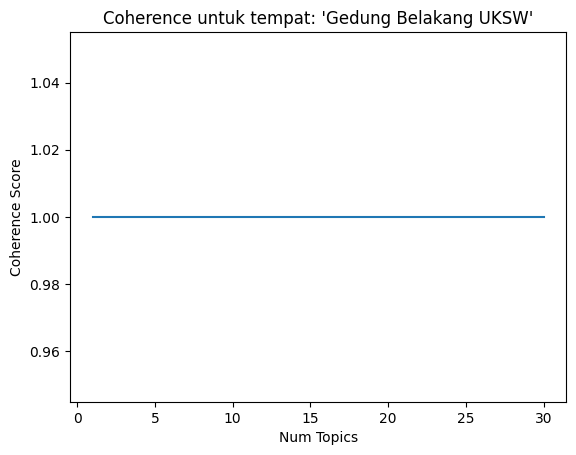

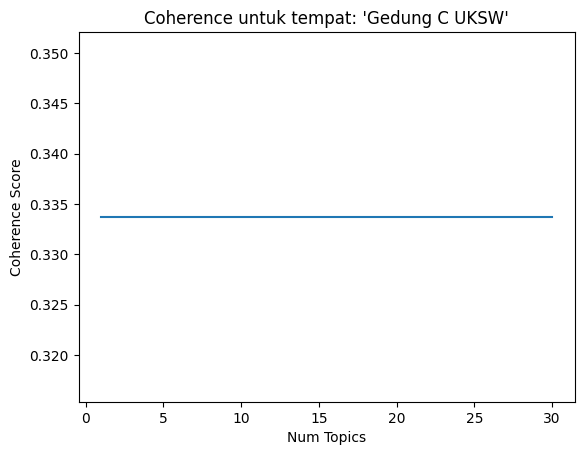

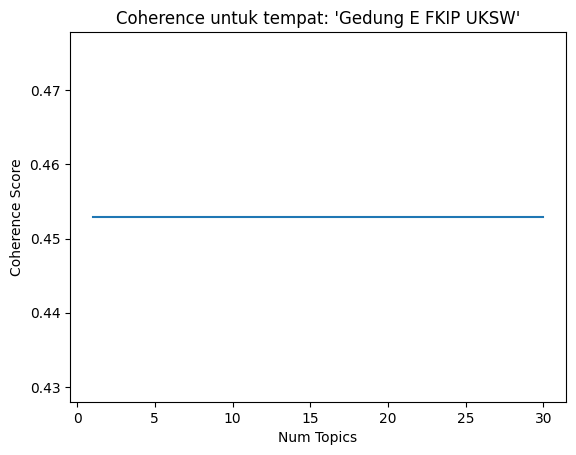

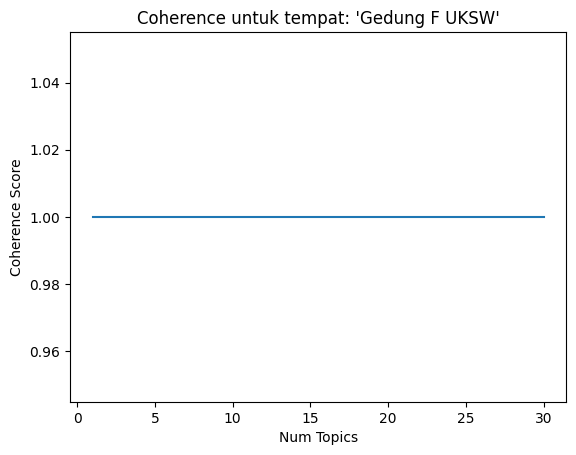

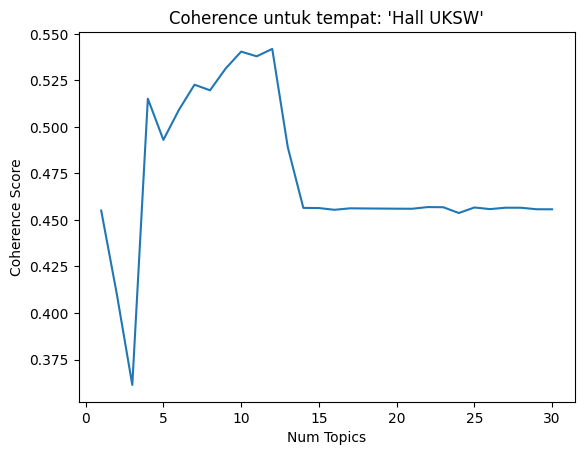

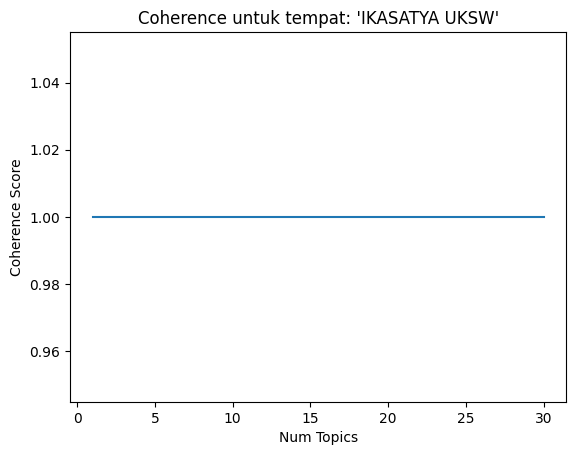

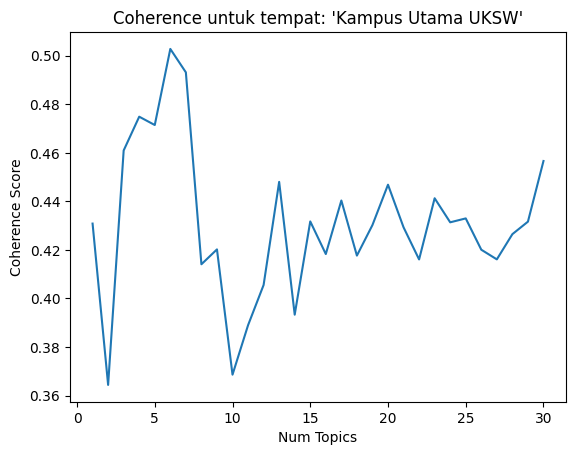

In [ ]:
import matplotlib.pyplot as plt

for place, group in place_groups:
    texts = group['token'].dropna().tolist()
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    model_list, coherence_values = compute_coherence_values(
        dictionary=dictionary, 
        corpus=corpus, 
        texts=texts,
        start=1, 
        limit=31, 
        step=1
    )

    plt.plot(range(1, 31), coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence Score")
    plt.title(f"Coherence untuk tempat: '{place}'")
    plt.show()

In [ ]:
for place, group in place_groups:
    print(f"Membuat LDA untuk tempat: {place}")

    texts = group['token'].dropna().tolist()
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    start, limit, step = 2, 31, 2
    x = list(range(start, limit, step))

    model_list, coherence_values = compute_coherence_values(
        dictionary=dictionary,
        corpus=corpus,
        texts=texts,
        start=start,
        limit=limit,
        step=step
    )

    print("\nCoherence per jumlah topik:")
    for m, cv in zip(x, coherence_values):
        print("Num Topics =", m, "has Coherence Value of", round(cv, 4))
    print("\n" + "-"*60 + "\n")

NameError: name 'place_groups' is not defined